In [ ]:
pip install yfinance

In [ ]:
# escolher algum ticker da B3 (Site da infomoney)

In [ ]:
import yfinance as yf
import pandas as pd
import plotly.express as px
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Definindo o símbolo da ação (ticker)
ticker_symbol = 'VALE3.sa'

# Coletando os dados históricos de preços da ação
stock_data = yf.download(ticker_symbol, start='2023-01-01', end='2023-10-24')

stock_data2 = yf.Ticker(ticker_symbol).history(start='2023-01-01', end='2023-10-24')

# Exibindo os primeiros registros dos dados coletados
print(stock_data.head())

# Limpeza dos dados
cleaned_data = stock_data.copy()  # Copiando os dados para evitar alterações nos originais

# Removendo linhas com valores faltantes
cleaned_data.dropna(inplace=True)

# Exibindo os primeiros registros dos dados limpos
print(cleaned_data.head())

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-02  88.680000  89.900002  88.529999  89.400002  84.917046  12783800
2023-01-03  89.400002  90.089996  88.889999  89.239998  84.765060  25332600
2023-01-04  89.300003  89.650002  87.949997  89.400002  84.917046  26395300
2023-01-05  89.459999  91.680000  89.000000  90.900002  86.341820  29085600
2023-01-06  91.000000  92.739998  91.000000  92.339996  87.709610  31420600
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-02  88.680000  89.900002  88.529999  89.400002  84.917046  12783800
2023-01-03  89.400002  90.089996  88.889999  89.239998  84.765060  25332600
2023-01-04  89.300003  89.650002  87.949997  89.400002  84.917046  26395300
2023-01-05  89.4599

In [ ]:
# Limpeza dos dados
cleaned_data2 = stock_data2.copy()  # Copiando os dados para evitar alterações nos originais

# Removendo linhas com valores faltantes
cleaned_data2.dropna(inplace=True)

# Exibindo os primeiros registros dos dados limpos
print(cleaned_data2.head())

                                Open       High        Low      Close  \
Date                                                                    
2023-01-02 00:00:00-03:00  84.233141  85.391965  84.090662  84.917038   
2023-01-03 00:00:00-03:00  84.917041  85.572436  84.432613  84.765060   
2023-01-04 00:00:00-03:00  84.822054  85.154502  83.539744  84.917038   
2023-01-05 00:00:00-03:00  84.974026  87.082705  84.537094  86.341820   
2023-01-06 00:00:00-03:00  86.436808  88.089553  86.436808  87.709610   

                             Volume  Dividends  Stock Splits  
Date                                                          
2023-01-02 00:00:00-03:00  12783800        0.0           0.0  
2023-01-03 00:00:00-03:00  25332600        0.0           0.0  
2023-01-04 00:00:00-03:00  26395300        0.0           0.0  
2023-01-05 00:00:00-03:00  29085600        0.0           0.0  
2023-01-06 00:00:00-03:00  31420600        0.0           0.0  


In [ ]:
cleaned_data['Daily_Return'] = cleaned_data['Adj Close'].pct_change()

In [ ]:
print(cleaned_data['Daily_Return'].head())

Date
2023-01-02         NaN
2023-01-03   -0.001790
2023-01-04    0.001793
2023-01-05    0.016778
2023-01-06    0.015842
Name: Daily_Return, dtype: float64


In [ ]:
# Calculando dados estatísticos
mean_return = cleaned_data['Daily_Return'].mean()
std_deviation = cleaned_data['Daily_Return'].std()
median_return = cleaned_data['Daily_Return'].median()
max_return = cleaned_data['Daily_Return'].max()
min_return = cleaned_data['Daily_Return'].min()

# Exibindo os resultados
print(f"Média dos retornos diários: {mean_return:.5f}")
print(f"Desvio padrão dos retornos diários: {std_deviation:.5f}")
print(f"Mediana dos retornos diários: {median_return:.5f}")
print(f"Maior retorno diário: {max_return:.5f}")
print(f"Menor retorno diário: {min_return:.5f}")

Média dos retornos diários: -0.00136
Desvio padrão dos retornos diários: 0.01727
Mediana dos retornos diários: -0.00181
Maior retorno diário: 0.05854
Menor retorno diário: -0.04622


In [ ]:
import plotly.express as px

fig = px.line(cleaned_data, x=cleaned_data.index, y='Adj Close',
              title=f'Preço de Fechamento Ajustado da Ação {ticker_symbol}')
fig.show()

In [ ]:
# Calculando o retorno diário acumulado
cleaned_data['Cumulative_Return'] = (1 + cleaned_data['Adj Close']
                                     .pct_change()).cumprod()

# Visualização do retorno diário acumulado usando Plotly
fig = px.line(cleaned_data, x=cleaned_data.index,
              y='Cumulative_Return',
              title=f'Retorno Diário Acumulado da Ação {ticker_symbol}')
fig.show()

In [ ]:
# modelagem quantitativa

In [ ]:
import yfinance as yf
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Símbolo da ação que você deseja calcular o beta
acao = 'PETR4.SA'  # Exemplo: PETR4 (Petrobras)

# Coletando os dados históricos do índice IBOV e da ação
data = yf.download(['^BVSP',acao], start='2023-01-01', end='2023-08-01')['Adj Close']

data.dropna(inplace=True)

ibov_returns = data['^BVSP'].pct_change().dropna()
acao_returns = data['PETR4.SA'].pct_change().dropna()

# Ajustando
linear_regressor = LinearRegression()
reg = linear_regressor.fit(ibov_returns.values.reshape(-1, 1),acao_returns.values
                           .reshape(-1, 1))

# Predict Y values from line found
ibov_returns_pred = linear_regressor.predict(ibov_returns.values.reshape(-1, 1))

print(f"Beta: {reg.coef_[0][0]}")

[*********************100%%**********************]  2 of 2 completed
Beta: 1.1335603292992134


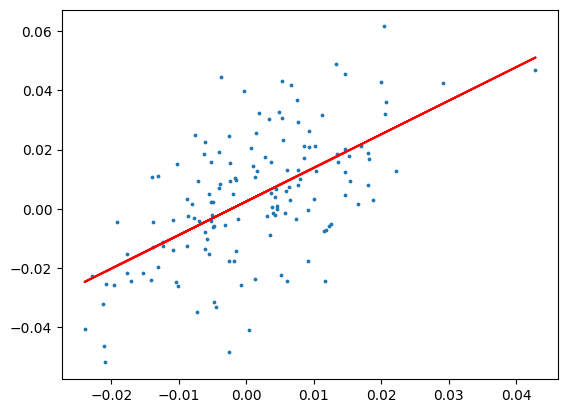

In [ ]:
# Plot scatter along with regression
plt.scatter(ibov_returns, acao_returns, s=3)
plt.plot(ibov_returns, ibov_returns_pred, color='red')
plt.show()

In [ ]:
import numpy as np

# Parâmetros do CAPM
risk_free_rate = 0.1325  # Taxa livre de risco (Selic)
market_return = ibov_returns.mean() * 252  # Retorno esperado do mercado

print(f"Retorno médio anualizado do IBOV {market_return:.4f}")

beta = 1.13  # Beta do ativo

# Cálculo do retorno esperado pelo CAPM
expected_return = risk_free_rate + beta * (market_return - risk_free_rate)

print(f"Retorno Esperado pelo CAPM: {expected_return:.4f}")

Retorno médio anualizado do IBOV 0.2557
Retorno Esperado pelo CAPM: 0.2717


In [ ]:
# Análise de risco e gestão de portfólio

In [ ]:
# Coletando os dados históricos de preços da ação
ibov = yf.download('^BVSP', start='2023-01-01', end='2023-10-24')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
print(ibov.head())

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2023-01-02  109734.0  109734.0  105981.0  106376.0   106376.0   8130500
2023-01-03  106377.0  106684.0  103852.0  104166.0   104166.0  14466700
2023-01-04  104167.0  105627.0  103915.0  105334.0   105334.0  14451200
2023-01-05  105336.0  107743.0  105333.0  107518.0   107518.0  15512000
2023-01-06  107642.0  109433.0  107642.0  108836.0   108836.0  12626600


In [ ]:
ibov["Returns"] = ibov['Adj Close'].pct_change()

In [ ]:
print(ibov.head())

                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2023-01-02  109734.0  109734.0  105981.0  106376.0   106376.0   8130500   
2023-01-03  106377.0  106684.0  103852.0  104166.0   104166.0  14466700   
2023-01-04  104167.0  105627.0  103915.0  105334.0   105334.0  14451200   
2023-01-05  105336.0  107743.0  105333.0  107518.0   107518.0  15512000   
2023-01-06  107642.0  109433.0  107642.0  108836.0   108836.0  12626600   

             Returns  
Date                  
2023-01-02       NaN  
2023-01-03 -0.020775  
2023-01-04  0.011213  
2023-01-05  0.020734  
2023-01-06  0.012258  


In [ ]:
# Get the list of all returns, excluding the first value which is NaN
returns_list = ibov["Returns"].to_list()[1:]

# Compute mean and standar deviation
mean = np.mean(returns_list)
std_dev = np.std(returns_list)

print(f"Mean: {mean:.4%}")
print(f"Std: {std_dev:.4%}")

Mean: 0.0349%
Std: 1.0883%


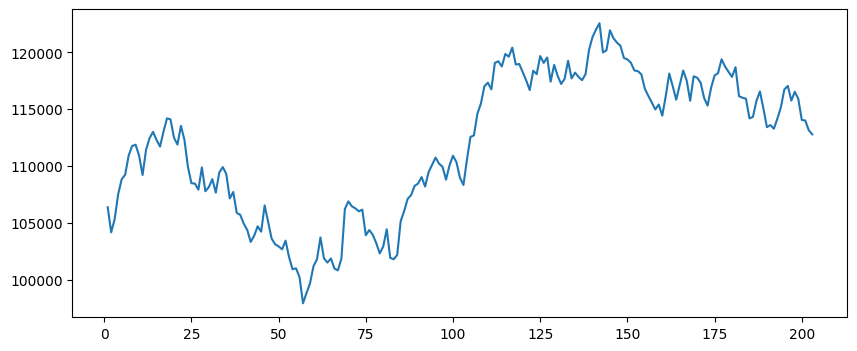

In [ ]:
# Generate list with all closes in the current year
# and the corresponding trading day
closes_list = ibov['Adj Close'].to_list()
days = [i for i in range(1, len(ibov['Adj Close']) + 1)]

# Plot closing prices
fig = plt.figure(figsize=(10, 4))
plt.plot(days, closes_list)

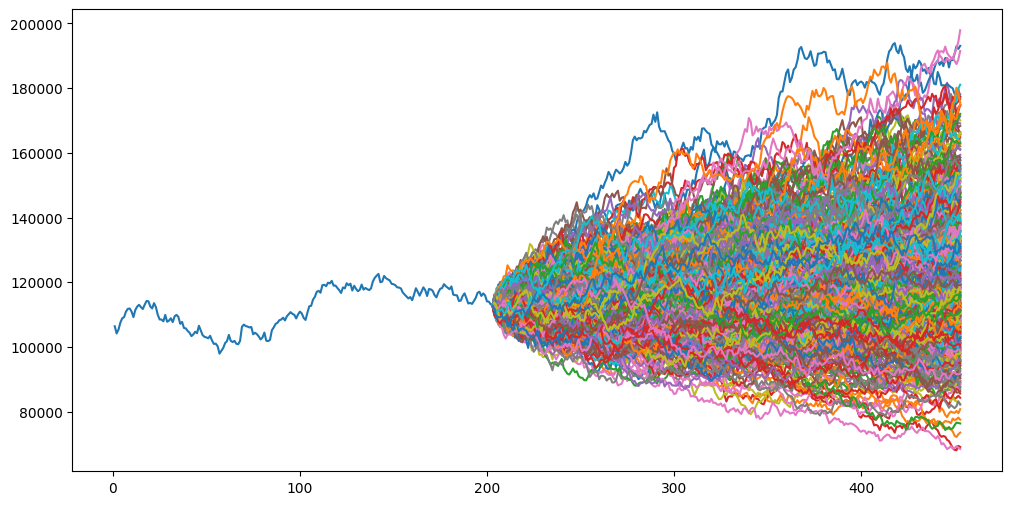

In [ ]:
from scipy.stats import norm
from random import random

# Plot closes again
fig = plt.figure(figsize=(12, 6))
plt.plot(days, closes_list)

# Number of simulations, i.e., curves that will be projected
simulations = 500

all_synthetic_closes = []

trading_days = 250

last_close = ibov['Close'][-1]

# Generate synthetic trading days
num_days = [days[-1]]
for i in range(trading_days):
  num_days.append(num_days[-1] + 1)

for i in range(simulations):
  closes = [last_close]

  # Generate synthetic closes
  for j in range(trading_days):
    pct_change = norm.ppf(random(), loc=mean, scale=std_dev)
    synthetic_close = closes[-1] * (1 + pct_change)
    closes.append(synthetic_close)

  last_synthetic_close = closes[-1]
  all_synthetic_closes.append(last_synthetic_close)

  plt.plot(num_days, closes)

In [ ]:
# VAR

# Generate VaR line
confidence = 95
var = np.percentile(all_synthetic_closes, 100 - confidence)

print(f"VaR = {round(var, 2)} with confidence = {confidence}%")

VaR = 91161.24 with confidence = 95%


In [ ]:
# O VaR de outra forma

In [ ]:
alpha = 0.05 # if 0.05, we are using: 1 - alpha = 0.95 or 95% confidence level

var =  norm.ppf(alpha, mean, std_dev)
print(f'The VaR value is {var:.2%} for our potfolio.')

The VaR value is -1.76% for our potfolio.


In [ ]:
capital = 100000
max_losses = var*capital

print(f'We have {1-alpha:.0%} confidence that out selected
portfolio of R${capital:.0f} invested will not
      exceed losses greater than R${max_losses:.2f} daily.')

We have 95% confidence that out selected portfolio of R$100000 invested will not exceed losses greater than R$-1755.26 daily.


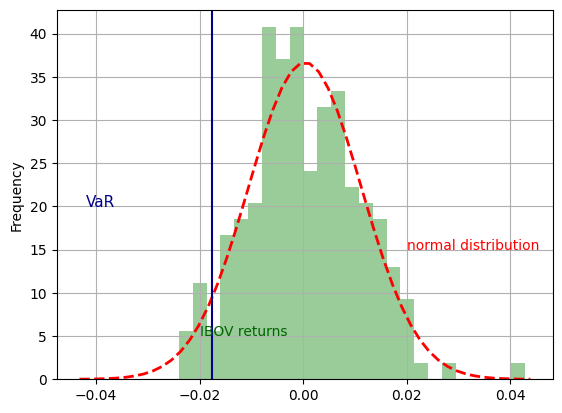

In [ ]:
# plot the histogram of the portfolio returns
ibov["Returns"].hist(bins=25, density=True, histtype='stepfilled', alpha=0.4,
                     color='green')

# plot a theoretical normal distribution based on portfolio returns statistics
x = np.linspace((mean - 4*std_dev), (mean + 4*std_dev), 50)
plt.plot(x, norm.pdf(x, mean, std_dev), 'r--', lw=2)

# add VaR value as a vertical line
plt.axvline(x=var, color = 'darkblue')

# add text to plot
plt.text(0.02, 15, 'normal distribution', fontsize=10, color='red')
plt.text(-0.02, 5, 'IBOV returns', fontsize=10, color='darkgreen')
plt.text(-0.042, 20, 'VaR', fontsize=11, color='darkblue')

# add label
plt.ylabel('Frequency')

plt.show()

In [ ]:
# Calculando o Break-Even com a SELIC

In [ ]:
# Generate breakeven risk free line
projected_risk_free = 0.1275
breakeven_close = last_close * (1 + projected_risk_free)
print(f"Breakeven compared with projected Selic:
{round(breakeven_close, 2)}")

above_breakeven = [close for close in
                   all_synthetic_closes if close > breakeven_close]
pct_above_breakeven = len(above_breakeven) / len(all_synthetic_closes)
print(f"Probability above breakeven: {pct_above_breakeven:.2%}")

Breakeven compared with projected Selic: 127165.09
Probability above breakeven: 42.80%


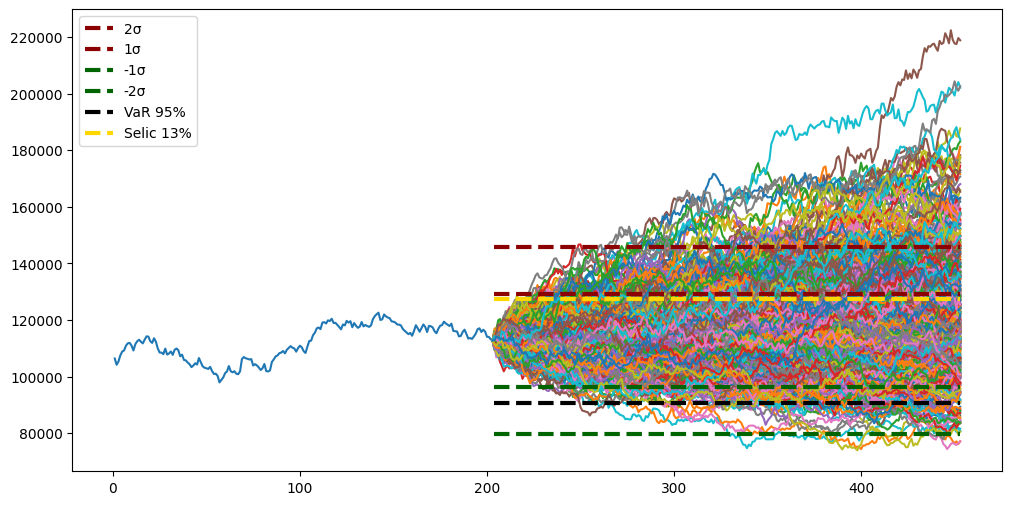

In [ ]:
from scipy.stats import norm
from random import random

# Plot closes again
fig = plt.figure(figsize=(12, 6))
plt.plot(days, closes_list)

# Number of simulations, i.e., curves that will be projected
simulations = 500

all_synthetic_closes = []

# Generate synthetic trading days
num_days = [days[-1]]
for i in range(trading_days):
  num_days.append(num_days[-1] + 1)

for i in range(simulations):
  closes = [last_close]

  # Generate synthetic closes
  for j in range(trading_days):
    pct_change = norm.ppf(random(), loc=mean, scale=std_dev)
    synthetic_close = closes[-1] * (1 + pct_change)
    closes.append(synthetic_close)

  last_synthetic_close = closes[-1]
  all_synthetic_closes.append(last_synthetic_close)

  plt.plot(num_days, closes)

factors = [2, 1, -1, -2]

# Rolling window period
period = 20

# Approximate number of data points in an year
trading_days = 250

ibov["Vol"] = np.round(ibov["Returns"].rolling(period).std() * np.sqrt(trading_days), 4)

vol = ibov['Vol'][-1]

# Generate supply and demand zones
for factor in factors:
  price_zone = round((1 + factor * vol) * last_close, 4)
  zones = [price_zone] * trading_days
  color = 'darkred' if factor > 0 else 'darkgreen'
  plt.plot(
      num_days[1:],
      zones,
      linewidth=3,
      linestyle='--',
      color=color,
      label=f"{factor}σ")

# Generate VaR line
confidence = 95
var = [np.percentile(all_synthetic_closes, 100 - confidence)] * trading_days
plt.plot(
      num_days[1:],
      var,
      linewidth=3,
      linestyle='--',
      color="black",
      label=f"VaR {confidence}%")

# Generate breakeven risk free line
projected_risk_free = 0.13
breakeven_close = last_close * (1 + projected_risk_free)
plt.plot(
      num_days[1:],
      [breakeven_close] * trading_days,
      linewidth=3,
      linestyle='--',
      color="gold",
      label=f"Selic {projected_risk_free:.0%}")

plt.legend(loc='upper left')

plt.show()

In [ ]:
# Machine learning

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pandas as pd
import yfinance as yf
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
def calc_hilo(data, window=14):

  data_hilo = pd.DataFrame(index=data.index)

  data_hilo['high_avg'] = data.High.rolling(window).mean()
  data_hilo['low_avg'] = data.Low.rolling(window).mean()

  data_hilo['high'] = np.where(data.Close > data_hilo['high_avg'], 1, 0)
  data_hilo['low'] = np.where(data.Close < data_hilo['low_avg'], -1, 0)

  array = []

  for index, row in data_hilo.iterrows():
    if row['high'] == 0 and row['low'] == 0:
      array.append(int(0))
    elif row['high'] == 1:
      array.append(int(1))
    elif row['low'] == -1:
      array.append(int(-1))

  return array

In [ ]:
def calc_adx(data, window=14):
  try:
    data_ant = data.shift(1)

    data['tr'] = pd.DataFrame([
            data.High - data.Low,
            np.absolute(data.High - data_ant.Close),
            np.absolute(data.Low - data_ant.Close)]).transpose().max(axis=1)

    data['dmPlus'] = np.where((data.High - data_ant.High) > (data_ant.Low - data.Low),
                        (data.High - data_ant.High).apply(
                                lambda x: np.max([x, 0])),
                        0)

    data['dmMinus'] = np.where((data_ant.Low - data.Low) > (data.High - data_ant.High),
                        (data_ant.Low - data.Low).apply(
                                lambda x: np.max([x, 0])),
                        0)

    data = data[1:]

    data['trAvg'] = np.NaN
    data['dmPlusAvg'] = np.NaN
    data['dmMinusAvg'] = np.NaN

    data.trAvg[window-1] = np.sum(data.iloc[0:window].tr)
    data.dmPlusAvg[window-1] = np.sum(data.iloc[0:window].dmPlus)
    data.dmMinusAvg[window-1] = np.sum(data.iloc[0:window].dmMinus)

    for i in range(window, len(data)):
        data.trAvg[i] = data.trAvg[i-1] - (data.trAvg[i-1] / window) + data.tr[i]
        data.dmPlusAvg[i] = data.dmPlusAvg[i-1] - (data.dmPlusAvg[i-1] / window) + data.dmPlus[i]
        data.dmMinusAvg[i] = data.dmMinusAvg[i-1] - (data.dmMinusAvg[i-1] / window) + data.dmMinus[i]

    data = data.dropna()

    data['diPlus'] = (data.dmPlusAvg / data.trAvg) * 100
    data['diMinus'] = (data.dmMinusAvg / data.trAvg) * 100

    data['DX'] = (np.absolute(data.diPlus - data.diMinus) / (data.diPlus + data.diMinus)) * 100
    data['ADX'] = np.NaN
    data['ADX'][window-1] = data.DX[0:window].mean()

    for i in range(window, len(data)):
        data.ADX[i] = (data.ADX[i-1] * (window - 1) + data.DX[i]) / window

    #data = data.dropna()

    return data[["ADX"]]
  except ValueError:
    raise Exception(f"Erro: ValueError")

In [ ]:
def plot_RSI(data ,column, window=14):

    # Establish gains and losses for each day
    data['Variation'] = data[column].diff()
    data = data[1:]
    data['Gain'] = np.where(data['Variation'] > 0, data['Variation'], 0)
    data['Loss'] = np.where(data['Variation'] < 0, data['Variation'], 0)

    # Calculate simple averages so we can initialize the classic averages
    simple_avg_gain = data['Gain'].rolling(window).mean()
    simple_avg_loss = data['Loss'].abs().rolling(window).mean()
    classic_avg_gain = simple_avg_gain.copy()
    classic_avg_loss = simple_avg_loss.copy()

    for i in range(window, len(classic_avg_gain)):
        classic_avg_gain[i] = (classic_avg_gain[i - 1] * (window - 1) + data['Gain'].iloc[i]) / window
        classic_avg_loss[i] = (classic_avg_loss[i - 1] * (window - 1) + data['Loss'].abs().iloc[i]) / window

    # Calculate the RSI
    RS = classic_avg_gain / classic_avg_loss

    #data[f"rsi"] = 100 - (100 / (1 + RS))
    #data['var_rsi'] = data['rsi'].diff()

    return 100 - (100 / (1 + RS))

In [ ]:
base = yf.Ticker('VALE3.sa').history(period='max')

for i in range(2,14):
  try:
    base[f"hilo_{i}"] = calc_hilo(base.copy(), window=i)
    base[f"adx_{i}"] = calc_adx(base.copy(), window=i)
    base[f"rsi_{i}"] = plot_RSI(data=base,column='Close', window=i)
  except Exception as e:
    print(e)
base['daily_return'] = ( base['Close']/base['Close'].shift(1) ) -1
base['classe'] = np.where(base['daily_return'] < 0, int(-1), int(1))

for i in range(1,36):
  base[f"mm{i}"] = base['Close'].rolling(i).mean()
  base[f"ewm{i}"] = base['Close'].ewm(span=i, adjust=False).mean()

In [ ]:
print(base.head(50))

                               Open      High       Low     Close   Volume  \
Date                                                                         
2000-01-03 00:00:00-02:00  1.616371  1.635999  1.616371  1.616371   585600   
2000-01-04 00:00:00-02:00  1.600977  1.604440  1.577886  1.577886   782400   
2000-01-05 00:00:00-02:00  1.558644  1.577886  1.558644  1.577886  1876800   
2000-01-06 00:00:00-02:00  1.577886  1.616371  1.577886  1.577886   792000   
2000-01-07 00:00:00-02:00  1.597128  1.643695  1.597128  1.635613  5347200   
2000-01-10 00:00:00-02:00  1.731826  1.770311  1.731826  1.770311  2980800   
2000-01-11 00:00:00-02:00  1.770311  1.781857  1.758765  1.774159   326400   
2000-01-12 00:00:00-02:00  1.778008  1.808795  1.774159  1.791477  5068800   
2000-01-13 00:00:00-02:00  1.851130  1.851130  1.851130  1.851130   120000   
2000-01-14 00:00:00-02:00  1.855363  1.885766  1.855363  1.885766  3484800   
2000-01-17 00:00:00-02:00  1.885765  1.924250  1.885765  1.92425

In [ ]:
print(base.tail(10))

                                Open       High        Low      Close  \
Date                                                                    
2023-10-16 00:00:00-03:00  67.400002  67.750000  67.180000  67.300003   
2023-10-17 00:00:00-03:00  67.000000  68.050003  66.589996  67.849998   
2023-10-18 00:00:00-03:00  67.239998  67.300003  65.330002  65.360001   
2023-10-19 00:00:00-03:00  65.300003  65.650002  64.419998  64.419998   
2023-10-20 00:00:00-03:00  63.320000  63.470001  62.000000  62.680000   
2023-10-23 00:00:00-03:00  62.389999  62.930000  62.110001  62.560001   
2023-10-24 00:00:00-03:00  64.000000  64.269997  63.570000  63.990002   
2023-10-25 00:00:00-03:00  64.699997  65.180000  63.750000  63.930000   
2023-10-26 00:00:00-03:00  63.799999  65.370003  63.610001  65.300003   
2023-10-27 00:00:00-03:00  65.470001  65.589996  64.709999  65.120003   

                             Volume  Dividends  Stock Splits  hilo_2  \
Date                                               

In [ ]:
base['classe'] = base['classe'].shift(-1)

In [ ]:
base.dropna(inplace=True)
base = base.reset_index(drop=True)

In [ ]:
previsores = base.drop(['Dividends', 'Stock Splits','daily_return',  'classe',  'Variation'], 1)
classe = base['classe']

In [ ]:
print(previsores)

           Open       High        Low      Close    Volume  hilo_2      adx_2  \
0      1.408552   1.408552   1.346976   1.404703   6235200       0  61.627291   
1      1.462046   1.462046   1.462046   1.462046     91200       1  40.848702   
2      1.462431   1.535553   1.462431   1.535553   2188800       1  54.764801   
3      1.516310   1.520158   1.492834   1.493219   1521600       0  61.722850   
4      1.520158   1.558643   1.520158   1.539401   9720000       0  73.974013   
...         ...        ...        ...        ...       ...     ...        ...   
5899  63.320000  63.470001  62.000000  62.680000  58015100      -1  87.106640   
5900  62.389999  62.930000  62.110001  62.560001  17595000       0  92.386075   
5901  64.000000  64.269997  63.570000  63.990002  21768800       1  58.447634   
5902  64.699997  65.180000  63.750000  63.930000  26091800       0  58.704418   
5903  63.799999  65.370003  63.610001  65.300003  30936700       1  62.117348   

          rsi_2  hilo_3    

In [ ]:
from sklearn.feature_selection import SelectKBest

features_list = list(previsores.columns)
k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(previsores, classe)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list, k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))
k_best_features_final = dict(ordered_pairs)
best_features = k_best_features_final.keys()
print ('')
print ("Melhores features:")
print (k_best_features_final)


Melhores features:
{'ewm35': 7.86621026769299, 'ewm34': 7.855302117273034, 'ewm33': 7.844180233961804, 'mm34': 7.837157279598379, 'mm35': 7.835152516471855, 'Open': 7.833704977984396, 'mm2': 7.8335339142498706, 'ewm32': 7.832854661553382, 'ewm1': 7.832609191540121, 'mm1': 7.832609191540121, 'Close': 7.832609191540121, 'mm33': 7.831890664491837, 'ewm31': 7.821337494345488, 'mm32': 7.819997206649718, 'ewm30': 7.809643073791781, 'mm31': 7.808701560927217, 'mm30': 7.801337779366114, 'ewm2': 7.79992632014489, 'ewm29': 7.797788201487538, 'High': 7.791766196257007, 'mm29': 7.786414608011202, 'ewm28': 7.785792372377546, 'mm28': 7.77554731044936, 'ewm27': 7.773678034242937, 'mm25': 7.769110430648026, 'mm26': 7.767546868300456, 'mm27': 7.765274273382421, 'mm24': 7.762639155081502, 'ewm26': 7.761470883015673, 'mm23': 7.749712568562124, 'ewm25': 7.749200208672918, 'ewm3': 7.746579393532313, 'mm3': 7.745620218441711, 'ewm24': 7.7368993140791575, 'mm22': 7.725981850077937, 'ewm23': 7.72460604089263

In [ ]:
print(classe)

0       1.0
1       1.0
2      -1.0
3       1.0
4       1.0
       ... 
5899   -1.0
5900    1.0
5901   -1.0
5902    1.0
5903   -1.0
Name: classe, Length: 5904, dtype: float64


In [ ]:
previsores = previsores.to_numpy()

In [ ]:
classe = np.where(classe == 1, 'UP', 'DOWN')
print(classe)

['UP' 'UP' 'DOWN' ... 'DOWN' 'UP' 'DOWN']


In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
previsores = scaler.fit_transform(previsores)

In [ ]:
classe = np.array(classe).reshape(-1, 1)
print(classe)

[['UP']
 ['UP']
 ['DOWN']
 ...
 ['DOWN']
 ['UP']
 ['DOWN']]


In [ ]:
print(np.unique(classe))

['DOWN' 'UP']


In [ ]:
# rede neural (nesse ponto tem que experimentar outras arquiteturas da rede #hidden_layer_sizes)
model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(64,64,64), max_iter = 10000, random_state=0)

# Aqui vou guardar as matrizes de confusão
conf_matrix_list_of_arrays = []
# Usar kfold para separar os índices de treino e de teste

#kf = KFold(n_splits=5, random_state=10, shuffle=True)

kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

# Guardar as precisões de 10 rodadas
precisao = []
models = []

# loop das 10 rodadas
for train_index, test_index in kf.split(previsores,classe):
  #Separação em treino e teste
  X_train, X_test = previsores[train_index], previsores[test_index]
  y_train, y_test = classe[train_index], classe[test_index]
  # Treinar o modelo
  model.fit(X_train, y_train)
  models.append(model)
  # Calcular a matriz de confusão
  #conf_matrix = confusion_matrix(lb.inverse_transform(y_test),lb.inverse_transform(model.predict(X_test)))
  conf_matrix = confusion_matrix(y_test,model.predict(X_test))
  # Guardar a matriz de confusão
  conf_matrix_list_of_arrays.append(conf_matrix)
  # Guardar a precisão
  #precisao_neu.append( accuracy_score(lb.inverse_transform(y_test), lb.inverse_transform(model.predict(X_test))) )
  precisao.append( accuracy_score(y_test, model.predict(X_test)) )
# imprimir o array de precisões
print(precisao)
# imprimir as matrizes de confusão (nesse caso estou imprimindo a matriz que o modelo teve a melhor acurácia)
print(conf_matrix_list_of_arrays[9])

print(classification_report(y_test,models[1].predict(X_test), target_names=np.unique(classe)))

[0.4970364098221846, 0.48687552921253174, 0.48518204911092294, 0.5012701100762066, 0.502116850127011, 0.49364944961896695, 0.5165114309906859, 0.5080440304826418, 0.48602878916172737, 0.5046570702794242]
[[258 267]
 [318 338]]
              precision    recall  f1-score   support

        DOWN       0.45      0.49      0.47       525
          UP       0.56      0.52      0.54       656

    accuracy                           0.50      1181
   macro avg       0.50      0.50      0.50      1181
weighted avg       0.51      0.50      0.51      1181



In [ ]:
print(conf_matrix_list_of_arrays[4])

[[240 314]
 [274 353]]


<Axes: >

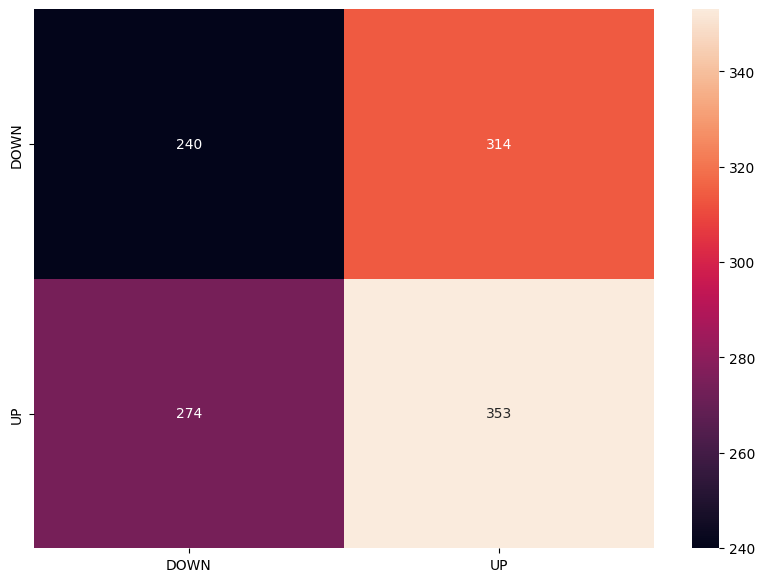

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf_matrix_list_of_arrays[4], index = np.unique(classe),
                  columns = np.unique(classe))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,fmt='d')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

# rede neural (nesse ponto tem que experimentar outras arquiteturas da rede #hidden_layer_sizes)
model = RandomForestClassifier(bootstrap = False, max_depth = 100,
                                    max_features = 'sqrt', min_samples_leaf = 3,
                                    min_samples_split = 5, n_estimators = 100)

# Aqui vou guardar as matrizes de confusão
conf_matrix_list_of_arrays = []
# Usar kfold para separar os índices de treino e de teste

#kf = KFold(n_splits=5, random_state=10, shuffle=True)

kf = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

# Guardar as precisões de 10 rodadas
precisao = []
models = []

# loop das 10 rodadas
for train_index, test_index in kf.split(previsores,classe):
  #Separação em treino e teste
  X_train, X_test = previsores[train_index], previsores[test_index]
  y_train, y_test = classe[train_index], classe[test_index]
  # Treinar o modelo
  model.fit(X_train, y_train)
  models.append(model)
  # Calcular a matriz de confusão

  #conf_matrix = confusion_matrix(lb.inverse_transform(y_test),lb.inverse_transform(modelRF.predict(X_test)))
  conf_matrix = confusion_matrix(y_test,model.predict(X_test))

  # Guardar a matriz de confusão
  conf_matrix_list_of_arrays.append(conf_matrix)
  # Guardar a precisão
  #precisao_rf.append( accuracy_score(lb.inverse_transform(y_test), lb.inverse_transform(modelRF.predict(X_test))) )
  precisao.append( accuracy_score(y_test, model.predict(X_test)) )

#Porque validacao cruzada

# imprimir o array de precisões
print(precisao)
# imprimir as matrizes de confusão (nesse caso estou imprimindo a matriz que o modelo teve a melhor acurácia)
print(conf_matrix_list_of_arrays[1])
65079365079
target_names = np.unique(classe)
print(classification_report(y_test,models[1].predict(X_test), target_names=target_names))

[0.510158013544018, 0.5152370203160271, 0.5214446952595937, 0.5208803611738149, 0.5107223476297968, 0.5107223476297968, 0.5152370203160271, 0.5225733634311512, 0.5129796839729119, 0.536117381489842]
[[366 483]
 [376 547]]
              precision    recall  f1-score   support

        DOWN       0.50      0.47      0.49       829
          UP       0.56      0.60      0.58       943

    accuracy                           0.54      1772
   macro avg       0.53      0.53      0.53      1772
weighted avg       0.53      0.54      0.53      1772



<Axes: >

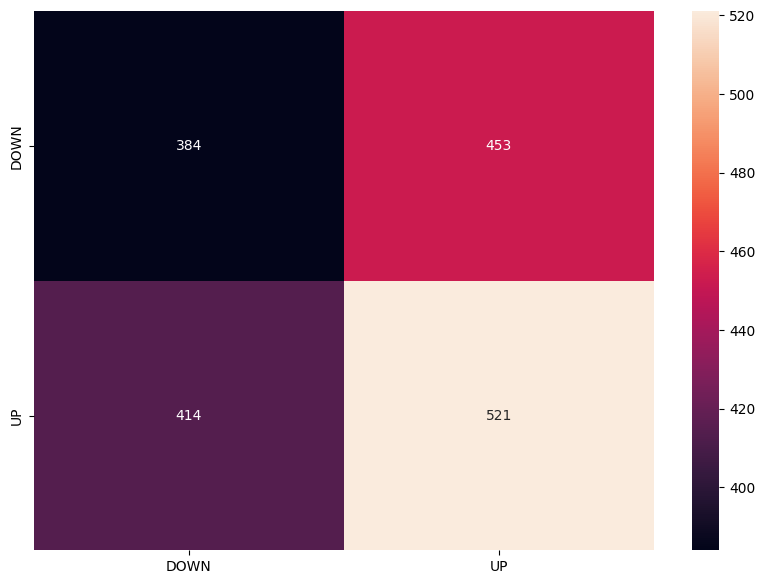

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf_matrix_list_of_arrays[4], index = np.unique(classe),
                  columns = np.unique(classe))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,fmt='d')